In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
filepath = "C:\\Users\\brons\\Downloads\\"
model_path = "firstdlmodel"
train_path = "cat_dog_data2.npz"
test_path = "cat_dog_test.npz"

In [3]:
model = tf.keras.models.load_model(os.path.join(filepath, model_path))
train_data = np.load(os.path.join(filepath, train_path))
train_image = train_data['name1']
train_label = train_data['name2']

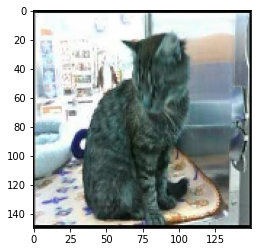

0.0


In [4]:
plt.imshow(train_image[5])
plt.show()
print(train_label[5])

In [6]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(train_image, train_label, batch_size = 4, epochs = 20)

Epoch 1/20
125/125 [==============================] - 10s 11ms/step - loss: 0.6882 - accuracy: 0.5580
Epoch 2/20
125/125 [==============================] - 1s 10ms/step - loss: 0.6849 - accuracy: 0.5660
Epoch 3/20
125/125 [==============================] - 1s 10ms/step - loss: 0.6809 - accuracy: 0.5660
Epoch 4/20
125/125 [==============================] - 1s 10ms/step - loss: 0.6776 - accuracy: 0.5660
Epoch 5/20
125/125 [==============================] - 1s 9ms/step - loss: 0.6663 - accuracy: 0.5660
Epoch 6/20
125/125 [==============================] - 1s 9ms/step - loss: 0.6462 - accuracy: 0.5840
Epoch 7/20
125/125 [==============================] - 1s 10ms/step - loss: 0.6184 - accuracy: 0.6360
Epoch 8/20
125/125 [==============================] - 2s 15ms/step - loss: 0.5940 - accuracy: 0.6800
Epoch 9/20
125/125 [==============================] - 2s 12ms/step - loss: 0.5459 - accuracy: 0.7300
Epoch 10/20
125/125 [==============================] - 2s 13ms/step - loss: 0.5232 - accurac

In [7]:
test_data = np.load(os.path.join(filepath, test_path))
test_image = test_data['name1']
test_image.shape

(1000, 150, 150, 3)

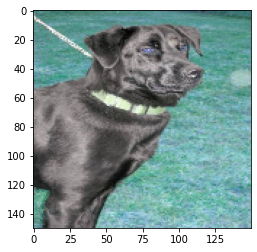

In [8]:
plt.imshow(test_image[5])
plt.show()

In [9]:
label_pred = model.predict(test_image)

32/32 [==============================] - 1s 19ms/step


In [12]:
label_pred = np.where(label_pred < 0.5, 0, 1)
label_pred

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [13]:
import pandas as pd

In [19]:
id = [x for x in range(len(label_pred))]
predict_df = pd.DataFrame({'id': id, 'label': label_pred.reshape(-1)})

In [20]:
predict_df

,id,label
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1
...,...,...
995,995,0
996,996,1
997,997,1
998,998,1


In [22]:
predict_df.to_csv(os.path.join(filepath, 'predicted_label'), index=False)